# Projekt MSP1
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 22. 10. 2023 v IS VUT. Kontrola bude probíhat na Pythonu 3.10.12; neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

Hung Do (xdohun00)

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi. Není dovoleno načítat jiné knihovny.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Z logu vás budou nejvíce zajímat řádky
```
Configuration: config6
Run: 191
Time of run: 53.298725254089774
```

Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou je to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

In [2]:
def load_logfile(f) -> dict:
    """Load a logfile from a file-like object and return a dict with the data."""
    data = {
        "conf": None,
        "run": None,
        "time": np.nan
    }

    for line in f:
        line = line.decode("utf-8").strip()
        if line.startswith("Configuration:"):
            data["conf"] = line.replace("Configuration: ", "")
        elif line.startswith("Run:"):
            data["run"] = int(line.replace("Run: ", ""))
        elif line.startswith("Time of run:"):
            data["time"] = float(line.replace("Time of run: ", ""))
        
    return data

data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        with zf.open(filename, "r") as f:
            data.append(load_logfile(f))
df = pd.DataFrame(data)
df

,conf,run,time
0,config1,0,104.967142
1,config1,1,98.617357
2,config1,2,106.476885
3,config1,3,115.230299
4,config1,4,97.658466
...,...,...,...
1195,config6,195,168.809495
1196,config6,196,159.607244
1197,config6,197,171.049799
1198,config6,198,164.478283


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. 

conf,config1,config2,config3,config4,config5,config6
run,,,,,,
0,104.967142,157.155747,108.111447,132.709658,208.148514,187.987109
1,98.617357,161.215691,128.012500,82.335040,164.518658,178.492674
2,106.476885,171.661025,140.104874,136.088178,182.883623,161.192607
3,115.230299,171.076041,140.939612,150.669136,166.131741,147.061264
4,97.658466,122.446613,130.998691,122.403047,166.965113,173.964466
...,...,...,...,...,...,...
195,103.853174,140.616487,129.799672,141.594586,171.566991,168.809495
196,91.161426,115.737309,134.602501,108.813345,233.930596,159.607244
197,0.010000,177.077447,120.424726,130.445021,199.225286,171.049799


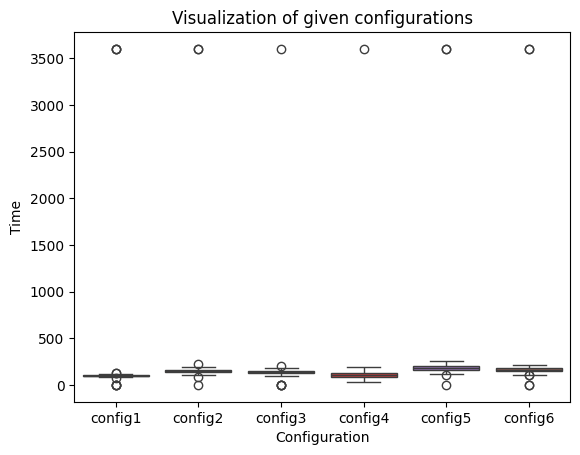

In [3]:
# TODO vykresleni grafu pro identifikace outlieru
df2 = df.copy(deep=True)
df2 = df2.pivot(values='time', index="run", columns="conf")
g2 = sns.boxplot(df2)
g2.set(ylabel='Time', xlabel='Configuration', title='Visualization of given configurations')
df2

__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů?_

U některých běhů buďto algoritmus nedoběhnul do maximálně stanoveného času (např. že se zacyklil, nebo program na něco čekal), nebo byl ihned ukončen (např. nastala chyba při načítání programu).

Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

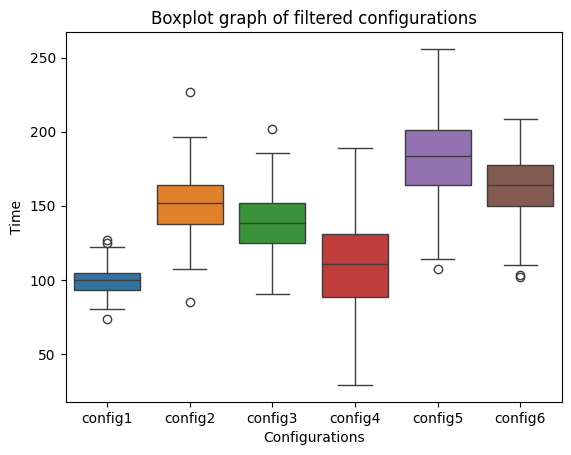

In [21]:
df3 = df.copy(deep=True)
df3 = df3.loc[(df3['time'] < 500)
              & (df3['time'] > 1)]
df_pivot = df3.pivot(values='time', index='run', columns='conf')
g = sns.boxplot(df_pivot)
_ = g.set(xlabel='Configurations', ylabel='Time', title='Boxplot graph of filtered configurations')

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry času pro jednotlivé konfigurace.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [5]:
df4 = df3.copy(deep=True)
df4 = df4.drop('run', axis=1)
df4 = df4.groupby('conf').agg(['describe', 'var'])
df4

time                                                             \
        describe                                                              
           count        mean        std         min         25%         50%   
conf                                                                          
config1    193.0   99.590413   9.386788   73.802549   92.979469   99.865028   
config2    197.0  151.732975  19.833198   85.174653  137.995662  151.516091   
config3    195.0  138.616959  19.867428   90.567110  124.803901  138.678404   
config4    199.0  110.317016  30.656816   29.093401   88.742158  110.782732   
config5    197.0  183.659767  28.729836  107.283620  164.070091  183.843132   
config6    196.0  162.829359  20.648193  102.074892  149.917475  163.990098   

                                             
                                        var  
                75%         max        time  
conf                                         
config1  104.824724  127.201692   88.111791  
config2  163.802880  227.054630  393.355739  
config3  151.536291  201.577616  394.714708  
config4  130.665606  188.971462  939.840347  
config5  201.250693  255.807973  825.403473  
config6  177.730865  208.795048  426.347856

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

- **count** - počet prvků
- **mean**  - průměrná hodnota
- **std**   - směrodatná odchylka
- **min**   - minimální hodnota
- **25%**   - hodnota prvku na 25 precentilu
- **50%**   - medián; hodnota prvku na 50 precentilu
- **75%**   - hodnota prvku na 75 precentilu
- **max**   - maximální hodnota
- **var**   - rozptyl

V průměru je `config1` nejrychlejší konfigurací, nicméně konfigurace `config4` dosáhla nejrychlejšího vyhodnocení. Naopak `config5` byla (v průměru) nejhorší z vybraných konfigurací. 

## Vizualizace
Vizualizujte časy běhů algoritmů v jednom kompaktním grafu tak, aby byl zřejmý i rozptyl hodnot. Zvolte vhodný graf, který pak níže komentujte.

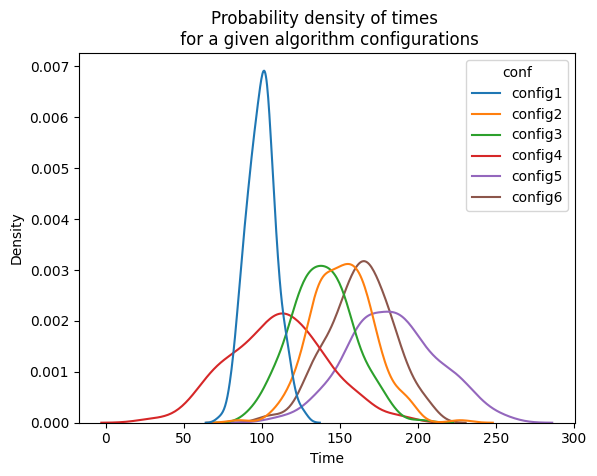

In [22]:
g = sns.kdeplot(df_pivot)
_ = g.set(xlabel='Time', ylabel='Density')
_ = g.set_title('Probability density of times \n for a given algorithm configurations')

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

Použil jsem kdeplot, který dokáže v jenom grafu porovnat zobrazit pravděpodobnostní rozložení všech konfigurací (jejich hustotu). Můžeme zde vidět, že konfigurace `config1` je nejkonzistentnější, protože jeho jeho rozloření je úzký, tudíž má malý rozptyl. Naopak rychlost konfigurace `config4` může záviset na vstupních hodnotách, jelikož zde můžeme vidět velký rozptyl.

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. Můžete i přidat další buňky.

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet studentova rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

Z grafu můžeme vyčíst, že konfigurace `config1` a `config4` jsou nejrychlejší. První konfigurace má menší varianci a nižší průměrnou hodnotu. Předpokládejme tedy, že je rychlejší.
Po vyčištění hodnot v máme v `config1` 193 validních výsledků a `config4` jich má 199. Jelikož jsou tyto dvě sady spolu nezávislé, použijeme T-test (přesněji Welchův t-test).

Naše nulová hypotéza H_0 říká, že **config4 je rychlejší než config1**. H_1 hypotéza pak tvrdí pravý opak. Test provádíme na hladině významnosti a = 0.05

Polohu a variabilitu vybraných konfigurací můžeme vyčíst z tabulky dole:
- **mean** - poloha
- **var**  - variabilita (rozptyl)
- **std**  - směrodatná odchylka


In [7]:
# comparing config1 and config4
df5 = df3.copy(deep=True)
df5 = df5.drop('run', axis=1)
df5 = df5.groupby('conf').agg(['mean', 'std', 'var'])
df5 = df5.loc[['config1', 'config4']]
df5

time                       
               mean        std         var
conf                                      
config1   99.590413   9.386788   88.111791
config4  110.317016  30.656816  939.840347

In [8]:
# running Welch's T-test on given configurations
stats.ttest_ind(df_pivot['config1'].dropna(), df_pivot['config4'].dropna(), equal_var=False, alternative='less')

TtestResult(statistic=-4.713292868840319, pvalue=2.0843410569946737e-06, df=235.8572821440884)

__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

Z testu můžeme vidět, že p-hodnota testu je mensi než 0.05. Nulovou hypotézu tedy odmítáme a alternativní přijímáme. `config1` je tedy rychlejší než `config4`.

In [9]:
# custom implementation of Welch's T-test
_x = df_pivot['config1'].copy(deep=True).dropna()
_y = df_pivot['config4'].copy(deep=True).dropna()

var_x, var_y = _x.var(), _y.var()
n_x, n_y = len(_x), len(_y)
mean_x, mean_y = _x.mean(), _y.mean()

_vn1 = var_x / n_x
_vn2 = var_y / n_y
# t statistic value
_t = (mean_x - mean_y) / np.sqrt(_vn1 + _vn2)

# degrees of freedom
_df = (_vn1+_vn2)**2 \
    / (_vn1**2 / (n_x - 1) \
       + (_vn2**2 / (n_y - 1)))

# using cumulative distribution function to get p-value
_p = stats.t.cdf(_t, df=_df)

# this is a one-sided test since we are testing whether 
# config1 is greater than config4 => we want our p-value to be less than 0.05
# to reject the null hypothesis
_t, _p


(-4.713292868840319, 2.0843410569946818e-06)